<a href="https://colab.research.google.com/github/hopeyunt/bot-friend/blob/main/%D0%9D%D0%95%D1%83_%D0%BA%D0%B5%D0%B9%D1%81_%D0%BD%D0%B0_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D1%82%D0%B8%D0%BA%D0%B0_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85_%D0%B4%D0%BB%D1%8F_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D1%8F_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Немножко вспомним Питон

In [ ]:
# в юпитере можно запускать код по очереди, при этом в памяти остается все запущенное.
# в переменные можно класть +- любые данные
xx = 5

In [ ]:
# для вывода данных в юпитере можно как просто вызвать переменную, так и использовать функцию print
xx

5

In [ ]:
print(xx)

5


In [ ]:
# с переменными можно делать все что угодно - перезаписывать, модифицировать (например, делить цифровые переменные или прибавлять значения к стройкам)
xx = 6
print(xx)
xx += 5
print(xx)

strng = 'Hello!'
print(strng)

strng = strng[0:-1] #убираем последнее значение, по факту берем от 0 значения, до -1
print(strng)

strng = strng + ' world'
print(strng)

6
11
Hello!
Hello
Hello world


# Бизнес-аналитический кейс Яндекс Афиши

Вас взяли на стажировку в Яндекс Афишу и выдали первые доступы к данным:
 - Логи визитов Яндекс Афири с июня 2017 по май 2018
 - Заказы за этот период
 - Статистика маркетинговых затрат


Давайте попробуем провести полный анализ по "аналитической воронке":
 - Как пользуются продуктом?
 - Когда люди начинают покупать (и когда продолжают, есть ли а-ха момент?)
 - Сколько приносит один юзер
 - Существует ли точка окупаемости?

## Table of Contents <a id='back'></a>
* [Вступление](#intro)
* [Подготовка данных](#data_prep)
* [Исследование и пре-процессинг](#preprocessing)
* [Метрики](#metrics)
    * [Продуктовые метрики](#metrics_product)
        * [Активная база](#active_users)
        * [Сессии на юзера](#daily_sessions)
        * [Длина сессий](#session_length)
        * [Retention Rate](#retention_rate)
    * [Продажи (гроус-метрики)](#metrics_sales)
        * [Time to Conversion](#conversion)
        * [Кол-во ордеров](#num_orders)
        * [Средний чек](#purchase_size)
        * [Customer Lifetime Value](#ltv)
    * [Маркетинговые метрики](#metrics_marketing)
        * [Общемаркетинговые затраты](#expenses)
        * [Customer Acquisition Cost (CAC)](#cac)
        * [Return on Investment](#roi)
* [Вывод](#conclusion)

## Вступление <a id='intro'></a>
Понимание поведения клиентов и оптимизация маркетинговых стратегий - важнейшие составляющие успеха любой онлайн-платформы. В "Яндекс Афише" мы стремимся расширить присутствие на рынке, оптимизируя расходы на маркетинг. Этот проект направлен на анализ различных показателей продукта, продаж и маркетинга, чтобы понять, как наши клиенты ведут себя и взаимодействуют с платформой, что позволяет нам принимать обоснованные решения относительно распределения маркетинговых ресурсов, что приведет к росту выручки и долгосрочным отношениям с клиентами.

**Бизнес-вопрос:**<br>
*Как мы можем распределить наш маркетинговый бюджет на целевых пользователей, которые с бОльшей вероятностью совершат первую и последующие покупки и будут иметь наибольший LTV, тем самым оптимизируя наши маркетинговые расходы?*

Этот вопрос поможет нам выяснить, как ведут себя наши клиенты. Мы рассмотрим данные за период с июня 2017 по май 2018 года. Данные о том, как люди посещают наш веб-сайт и что они покупают. У нас также есть информация о том, сколько денег мы тратим на маркетинг. Мы хотим знать, как наши клиенты используют наш продукт и сколько денег они приносят нам.

 [⬆ Back to Contents](#back)

## Подготовка данных <a id='data_prep'></a>

Файлы не очень большие, но их оптимально использовать в таком порядке - посмотреть данные с т.з. качества, выставить правильные форматы для более удобной работы и затем уже экстраполировать работу на весь датасет. Возьмем первые 500 строк, у нас нет причин думать, что этого количества не хватит для репрезентативности. Можно также взять семпл (рандомные N строк из файла) - какой вариант покажется вам тут лучше

In [ ]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

In [ ]:
try:
    visits = pd.read_csv('visits_log_us.csv', nrows=500)
except:
    visits = pd.read_csv('https://raw.githubusercontent.com/Grammer/neu_files/refs/heads/main/visits_log_us.csv', nrows=500)

visits.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Device     500 non-null    object
 1   End Ts     500 non-null    object
 2   Source Id  500 non-null    int64 
 3   Start Ts   500 non-null    object
 4   Uid        500 non-null    uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 113.1 KB


In [ ]:
try:
    orders = pd.read_csv('orders_log_us.csv', nrows=500)
except:
    orders = pd.read_csv('https://raw.githubusercontent.com/Grammer/neu_files/refs/heads/main/orders_log_us.csv', nrows=500)

orders.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   500 non-null    object 
 1   Revenue  500 non-null    float64
 2   Uid      500 non-null    uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 45.0 KB


In [ ]:
try:
    costs = pd.read_csv('costs_us.csv', nrows=500)
except:
    costs = pd.read_csv('https://raw.githubusercontent.com/Grammer/neu_files/refs/heads/main/costs_us.csv', nrows=500)

costs.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  500 non-null    int64  
 1   dt         500 non-null    object 
 2   costs      500 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 40.7 KB


Наши таблицы `visits`, `orders`, and `costs` на сейчас имеют размеры 113, 45 и 40 KB. Оптимизируем из и посмотрим сколько места можно сэкономить (вот эту работу обычно делают инженеры данных, Data Engineer)

Изучим уникальные значения колонок категорий (например, тип девайса)

In [ ]:
visits['Device'].value_counts()

,count
Device,
desktop,363
touch,137


In [ ]:
visits['Source Id'].value_counts()

,count
Source Id,
4,159
3,122
5,92
2,52
1,39
9,19
10,17


Поскольку в столбце `Device` есть только два различных значения, мы изменим его тип с объекта на категорию, поскольку последняя занимает значительно меньше места. Поскольку столбец `Source Id` имеет тип `int`, мы оставим его как есть, даже если нам не нужно выполнять над ним числовые операции, поскольку при изменении на category размер не сильно изменится.

In [ ]:
visits['Device'] = visits['Device'].astype('category')

В этой таблице также есть столбцы `Start` и `End Ts`, содержащие дату и время, но сохраненные в виде объектов. Давайте проверим формат этих столбцов и изменим тип на datetime.

In [ ]:
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [ ]:
visits['Start Ts'] = pd.to_datetime(visits['Start Ts'], format='%Y-%m-%d %H:%M:%S')
visits['End Ts'] = pd.to_datetime(visits['Start Ts'], format='%Y-%m-%d %H:%M:%S')

In [ ]:
visits.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Device     500 non-null    category      
 1   End Ts     500 non-null    datetime64[ns]
 2   Source Id  500 non-null    int64         
 3   Start Ts   500 non-null    datetime64[ns]
 4   Uid        500 non-null    uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 16.5 KB


Таблица `visits` теперь намного меньше. Если раньше она занимала 113 килобайт, то теперь ее размер составляет всего около 16. Давайте посмотрим на таблицу `orders`. В ней всего 3 столбца, и мы изменим тип одного из них.

In [ ]:
orders['Buy Ts'] = pd.to_datetime(orders['Buy Ts'], format='%Y-%m-%d %H:%M:%S')

In [ ]:
orders.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   500 non-null    datetime64[ns]
 1   Revenue  500 non-null    float64       
 2   Uid      500 non-null    uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 11.8 KB


Тоже сократили почти в 3 раза, с  45 KB до 12 KB.

Поправим табличку `costs` по аналогии

In [ ]:
costs['source_id'].value_counts()

,count
source_id,
1,363
2,137


Используем начало таблички, вполне возмодно, что сорцов будет больше, пока не трогаем

In [ ]:
costs['dt'].head()

,dt
0,2017-06-01
1,2017-06-02
2,2017-06-03
3,2017-06-04
4,2017-06-05


In [ ]:
costs['dt'] = pd.to_datetime(costs['dt'], format='%Y-%m-%d')

In [ ]:
costs.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  500 non-null    int64         
 1   dt         500 non-null    datetime64[ns]
 2   costs      500 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 11.8 KB


Таблицы поправили, пересчитываем весь датасет

In [ ]:
try:
    visits = pd.read_csv(
        'visits_log_us.csv',
        dtype={'Device': 'category'},
        parse_dates=['Start Ts', 'End Ts'],
    )
except:
    visits = pd.read_csv(
        'https://raw.githubusercontent.com/Grammer/neu_files/refs/heads/main/visits_log_us.csv',
        dtype={'Device': 'category'},
        parse_dates=['Start Ts', 'End Ts'],
    )

visits.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  category      
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  int64         
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


In [ ]:
try:
    orders = pd.read_csv(
        'orders_log_us.csv',
        parse_dates=['Buy Ts'],
    )
except:
    orders = pd.read_csv(
        'https://raw.githubusercontent.com/Grammer/neu_files/refs/heads/main/orders_log_us.csv',
        parse_dates=['Buy Ts'],
    )

orders.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [ ]:
try:
    costs = pd.read_csv(
        'costs_us.csv',
        parse_dates=['dt'],
    )
except:
    costs = pd.read_csv(
        'https://raw.githubusercontent.com/Grammer/neu_files/refs/heads/main/costs_us.csv',
        parse_dates=['dt'],
    )

costs.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


 [⬆ Back to Contents](#back)

## Исследование и пре-процессинг <a id='preprocessing'></a>

Базовый анализ данных сделали, правильную типизацию организовали. Осталось поправить кривые названия :) Используем <a href='https://ru.wikipedia.org/wiki/Snake_case'>Snake_case</a>

In [ ]:
# Переименуем колонки в snake_case
def renaming_columns(columns):
    '''
    Переименуем столбцы датафрейма, разделив их начальным и конечным регистрами, удалив начальные и конечные пробелы,
    изменив их на строчные и заменив пробелы между словами символами подчеркивания для snake_case.

    параметры: столбцы - список исходных заголовков датафрейма.

    возвращает: словарь с исходными заголовками в качестве ключей и очищенными заголовками в качестве элементов.
    '''

    new_headers = {}

    for header in columns:
        new_header = re.sub(r'([a-z])([A-Z])', r'\1 \2', header)  #split camel case into sep words
        new_header = new_header.strip().lower().replace(' ', '_')
        new_headers[header] = new_header

    return new_headers

In [ ]:
columns = visits.columns
columns_clean = renaming_columns(columns)

visits = visits.rename(columns = columns_clean)
visits.columns

Index(['device', 'end_ts', 'source_id', 'start_ts', 'uid'], dtype='object')

In [ ]:
columns = orders.columns
columns_clean = renaming_columns(columns)

orders = orders.rename(columns = columns_clean)
orders.columns

Index(['buy_ts', 'revenue', 'uid'], dtype='object')

Проверим данные на полные дубли. По логике данных, полных дублей быть не должно (не может быть 2 одинаковых заказа в одну микросекунду, 2 одинаковых костов за 1 период и т.д)

In [ ]:
visits.duplicated().sum()

0

In [ ]:
orders.duplicated().sum()

0

In [ ]:
costs.duplicated().sum()

0

Дублей нет, супер. По условию данные сессий должны быть за сопоставимые периоды начала и конца, проверим

In [ ]:
min_start = visits['start_ts'].dt.date.min()
max_start = visits['start_ts'].dt.date.max()
min_end = visits['end_ts'].dt.date.min()
max_end = visits['end_ts'].dt.date.max()

print(f'Сессии начинаются между {min_start} и {max_start}')
print(f'И заканчиваются между {min_end} и {max_end}')

Сессии начинаются между 2017-06-01 и 2018-05-31
И заканчиваются между 2017-06-01 и 2018-06-01


In [ ]:
visits['start_ts'].describe()

,start_ts
count,359400
mean,2017-12-18 06:17:32.010517760
min,2017-06-01 00:01:00
25%,2017-10-15 09:41:00
50%,2017-12-18 18:46:00
75%,2018-02-28 09:54:00
max,2018-05-31 23:59:00


Все старты сессий в правильном порядке, а вот концы сессий чуть выходят за оговоренные рамки. Давайте проверим, когда они начались и является ли это багом в данных

In [ ]:
visits[visits['end_ts'].dt.date > pd.to_datetime('2018-05-31').date()]

,device,end_ts,source_id,start_ts,uid
2330,desktop,2018-06-01 00:05:00,2,2018-05-31 23:30:00,5300693976971713685
43215,desktop,2018-06-01 00:13:00,4,2018-05-31 23:46:00,12296626599487328624
46667,desktop,2018-06-01 00:13:00,5,2018-05-31 23:48:00,1107134732939577311
154728,desktop,2018-06-01 00:09:00,2,2018-05-31 22:52:00,12484396335714047199
198329,desktop,2018-06-01 00:11:00,3,2018-05-31 23:59:00,3720373600909378583
216791,touch,2018-06-01 00:06:00,5,2018-05-31 23:45:00,9951896961656595558
263781,desktop,2018-06-01 00:25:00,1,2018-05-31 23:59:00,4906562732540547408
269213,touch,2018-06-01 00:12:00,10,2018-05-31 23:59:00,10723414689244282024
288563,touch,2018-06-01 00:01:00,4,2018-05-31 23:37:00,1094281763368510391
299620,desktop,2018-06-01 00:04:00,4,2018-05-31 23:59:00,83872787173869366


Выглядит нормально, старты у всех до 13 мая и окончания близко по времени. Чуть-чуть данных за июнь ничего не сломают в данном случае.

Проверим данные на bullshit - может ли сессия начаться после старта?

In [ ]:
visits[visits['start_ts'] > visits['end_ts']]

,device,end_ts,source_id,start_ts,uid
4181,desktop,2018-03-25 03:18:00,3,2018-03-25 03:50:00,13092152539246794986
177972,desktop,2018-03-25 03:09:00,9,2018-03-25 03:55:00,4621202742905035453


Два кейса есть, это незначительно мало, просто выкинем их

In [ ]:
visits = visits.drop(visits[visits['start_ts'] > visits['end_ts']].index).reset_index()
visits.shape

(359398, 6)

In [ ]:
min_buy_dt = orders['buy_ts'].dt.date.min()
max_buy_dt = orders['buy_ts'].dt.date.max()

print(f'Заказы произведены межну {min_buy_dt} и {max_buy_dt}')

Заказы произведены межну 2017-06-01 и 2018-06-01


In [ ]:
orders[orders['buy_ts'].dt.date > pd.to_datetime('2018-05-31').date()]

,buy_ts,revenue,uid
50414,2018-06-01 00:02:00,3.42,83872787173869366


1 заказ в начале июня, скорее всего одна из тех сессий, начатых в конце мая 2018, не кажется проблемой

In [ ]:
min_cost = costs['dt'].min()
max_cost = costs['dt'].max()

print(f'Затраты между {min_cost} и {max_cost}')

Затраты между 2017-06-01 00:00:00 и 2018-05-31 00:00:00


Очень долго к этому шли, но давайте уже займемся продуктовой и growth-аналитикой :)

 [⬆ Back to Contents](#back)


## Метрики <a id='metrics'></a>

В этом разделе мы рассмотрим некоторые важные цифры. Мы хотим узнать больше о том, как люди используют наш продукт, насколько хорошо он продается и насколько хорош наш маркетинг. Мы выясним, что мы можем сделать, чтобы улучшить наш продукт и лучше тратить на него наши деньги.

### Продуктовые метрики <a id='metrics_product'></a>

Давайте погенерим список метрик, которые было бы интересно посмотреть для верхнеуровневого анализа.
 - DAU/WAU/MAU (daily/weekly/monthly active users)
 - Сессий в день и на юзера
 - ???

#### DAU/WAU/MAU <a id='active_users'></a>

In [ ]:
# Сделаем колонки для удобной группировки сессий
visits['session_year'] = visits['start_ts'].dt.isocalendar().year
visits['session_month'] = visits['start_ts'].dt.month
visits['session_week'] = visits['start_ts'].dt.isocalendar().week
visits['session_date'] =  visits['start_ts'].dt.floor('D')

In [ ]:
visits.head()

,index,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date
0,0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20
1,1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19
2,2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01
3,3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20
4,4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27


In [ ]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359398 entries, 0 to 359397
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   index          359398 non-null  int64         
 1   device         359398 non-null  category      
 2   end_ts         359398 non-null  datetime64[ns]
 3   source_id      359398 non-null  int64         
 4   start_ts       359398 non-null  datetime64[ns]
 5   uid            359398 non-null  uint64        
 6   session_year   359398 non-null  UInt32        
 7   session_month  359398 non-null  int32         
 8   session_week   359398 non-null  UInt32        
 9   session_date   359398 non-null  datetime64[ns]
dtypes: UInt32(2), category(1), datetime64[ns](3), int32(1), int64(2), uint64(1)
memory usage: 21.6 MB


In [ ]:
dau = visits.groupby('session_date').agg({'uid': 'nunique'})
dau = dau.rename(columns={'uid': 'users_cnt'})
dau.head()

,users_cnt
session_date,
2017-06-01,605
2017-06-02,608
2017-06-03,445
2017-06-04,476
2017-06-05,820


Нарисуем график для метрики. Эта метрика изменяется в динамике, значит подойдет линейный график

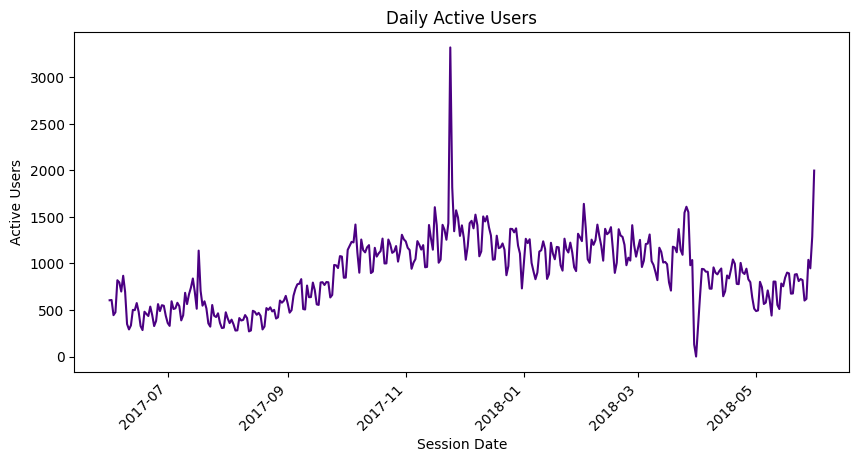

Среднее Daily Active Users - 908.
Медианное Daily Active Users - 921.


In [ ]:
dau_plot = dau.plot(kind='line', figsize=(10,5), rot=45, legend=False, color='indigo')

plt.title('Daily Active Users')
plt.xlabel('Session Date')
plt.ylabel('Active Users')

plt.show()

dau_mean = dau['users_cnt'].mean()
dau_median = dau['users_cnt'].median()
print(f'Среднее Daily Active Users - {dau_mean:.0f}.')
print(f'Медианное Daily Active Users - {dau_median:.0f}.')

Рост с начала августа (выход с летних праздников), очень значительный пик в ноябре, потом выходим на плато

In [ ]:
# weekly active users
wau = visits.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'})
wau = wau.rename(columns={'uid': 'users_cnt'})

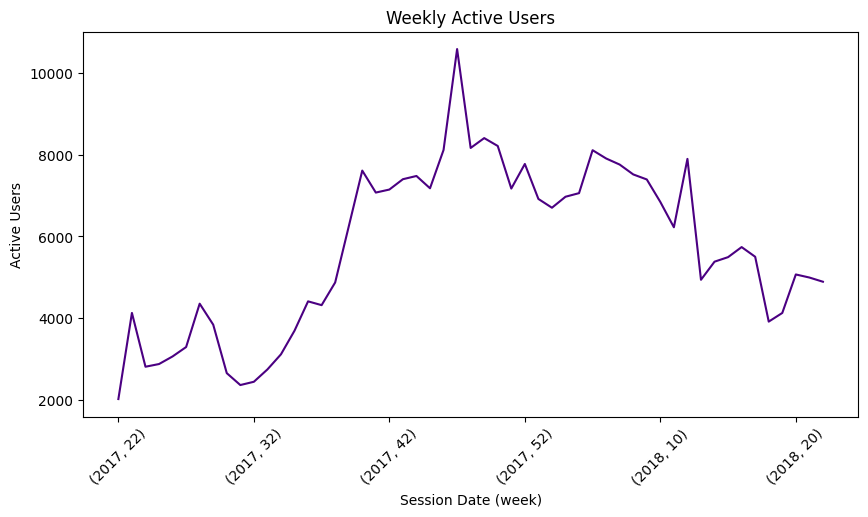

Среднее Weekly Active Users - 5716.
Медианное Weekly Active Users - 5740.


In [ ]:
wau_plot = wau.plot(kind='line', figsize=(10,5), rot=45, legend=False, color='indigo')
plt.title('Weekly Active Users')
plt.xlabel('Session Date (week)')
plt.ylabel('Active Users')

plt.show()

wau_mean = wau['users_cnt'].mean()
wau_median = wau['users_cnt'].median()

print(f'Среднее Weekly Active Users - {wau_mean:.0f}.')
print(f'Медианное Weekly Active Users - {wau_median:.0f}.')

In [ ]:
# montly active users
mau = visits.groupby(['session_year', 'session_month']).agg({'uid': 'nunique'})
mau = mau.rename(columns={'uid': 'users_cnt'})

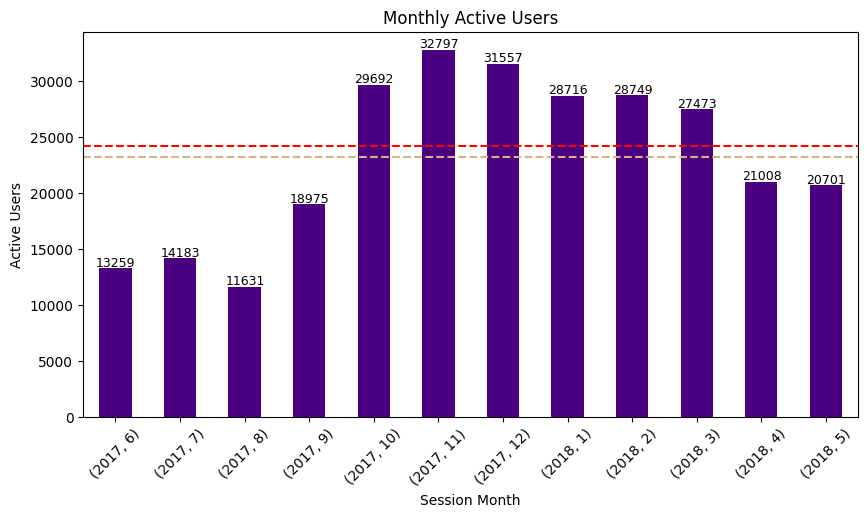

Среднее  Monthly Active Users is 23228.
Медианное Monthly Active Users is 24240.


In [ ]:
mau_mean = mau['users_cnt'].mean()
mau_median = mau['users_cnt'].median()

mau_plot = mau.plot(kind='bar', figsize=(10,5), rot=45, legend=False, color='indigo')

mau_plot.axhline(mau_mean, color='tan', linestyle='--', label='Mean')
mau_plot.axhline(mau_median, color='red', linestyle='--', label='Median')


plt.title('Monthly Active Users')
plt.xlabel('Session Month')
plt.ylabel('Active Users')

for i, y in enumerate(mau['users_cnt']):
    plt.text(i - 0.3, y+200, s=str(round(y, 2)), fontsize=9)

plt.show()

print(f'Среднее  Monthly Active Users is {mau_mean:.0f}.')
print(f'Медианное Monthly Active Users is {mau_median:.0f}.')

Если посмотреть на ежемесячное количество активных пользователей, то можно увидеть, что последние три и первые три месяца года демонстрируют активность выше средней. Как мы видели в ежедневной активности, пик активности пришелся на ноябрь, предположительно, из-за какого-то большого события. Хотя эти показатели не дают много информации о функциях приложения, они свидетельствуют о более высокой активности пользователей осенью и зимой - это может быть сезонным трендом.

In [ ]:
sticky_factor_w = (round(dau_mean/wau_mean, 5))*100
sticky_factor_w

15.884

In [ ]:
sticky_factor_m = (round(dau_mean/mau_mean, 4))*100
sticky_factor_m

3.91

Коэффициент привязки к продукту (sticky factor) за неделю говорит о том, что в среднем относительно небольшая доля активных пользователей, пользующихся продуктом еженедельно, возвращается к нему ежедневно (около 16%). Аналогичным образом, коэффициент привязки за месяц указывает на относительно низкий уровень ежедневной вовлеченности по сравнению с месячной базой пользователей (около 4%).

Нормально ли это?

 [⬆ Back to Contents](#back)

#### Кол-во сессий в день <a id='daily_sessions'></a>

In [ ]:
# Среднее кол-во сессий на каждого юзера
sessions_per_date = visits.groupby('session_date', as_index=False).agg(sessions_cnt=('uid', 'count'), users_cnt=('uid', 'nunique'))
sessions_per_date['sessions_per_user'] = (sessions_per_date['sessions_cnt']/sessions_per_date['users_cnt'])

# Среднее кол-во сессий
mean_sessions_daily = sessions_per_date['sessions_cnt'].sum() / sessions_per_date['users_cnt'].sum()

print(f'Среднее кол-во сессий - {mean_sessions_daily:.2f}.')
sessions_per_date.sample(10)

Среднее кол-во сессий - 1.09.


,session_date,sessions_cnt,users_cnt,sessions_per_user
190,2017-12-08,1541,1411,1.092133
277,2018-03-05,1328,1209,1.098428
294,2018-03-22,1467,1369,1.071585
265,2018-02-21,1418,1285,1.103502
356,2018-05-24,907,833,1.088836
203,2017-12-21,1315,1215,1.082305
48,2017-07-19,610,547,1.115174
125,2017-10-04,1331,1232,1.080357
87,2017-08-27,439,422,1.040284
345,2018-05-13,549,511,1.074364


Среднее количество сеансов в день, превышающее 1, указывает на то, что в некоторые дни некоторые пользователи проводят более одного сеанса. Это, впрочем, не обязательно означает, что все пользователи активны каждый день.

In [ ]:
# plot average number of sessions per user per day
sessions_fig = px.line(sessions_per_date,
              x='session_date',
              y='sessions_per_user',
              width=900,
              height=500,
              title='Sessions per User',
              hover_data=['sessions_cnt', 'users_cnt']
             )

sessions_fig.update_layout(title='Sessions per User',
                           xaxis_title='Session Date',
                           yaxis_title='Sessions per User')

sessions_fig.show()

Из этого графика мы можем видеть, что количество сеансов в день, по-видимому, относительно стабильно, поскольку среднее количество сеансов на пользователя равно или превышает 1 и достигает 1,2 за каждый день. Это указывает на то, что некоторые пользователи проводят более одного сеанса в день, но их не очень много. Давайте визуализируем распределение всех сеансов с помощью бокс-графика ( <a href='https://ru.wikipedia.org/wiki/Ящик_с_усами'>Ящик с усами</a>).

In [ ]:
# plot distribution of number of sessions
box_fig = px.box(sessions_per_date,
                y="sessions_cnt",
                hover_data=['session_date', 'users_cnt'])

box_fig.update_layout(width=600,
                height=500,
                yaxis_title='Num of sessions',
                title='Daily Sessions')

box_fig.show()

Есть несколько точек - заметных выбросов. Перегруппируем данные помесячно (обратите внимание, что важно сделать группировку и по году, и по месяцу)

In [ ]:
sessions_per_month = visits.groupby(['session_year', 'session_month']).agg({'uid': ['count', 'nunique']})
sessions_per_month.columns = sessions_per_month.columns.droplevel(level=0)
sessions_per_month.columns = ['n_sessions', 'n_users']
sessions_per_month = sessions_per_month.reset_index()

sessions_per_month['session_Ym'] = sessions_per_month['session_year'].astype(str)+ '-' + sessions_per_month['session_month'].astype(str)
sessions_per_month.set_index(['session_year', 'session_month'], inplace=True)

sessions_per_month['sessions_per_user'] = sessions_per_month['n_sessions'] / sessions_per_month['n_users']

sessions_per_month

n_sessions  n_users session_Ym  sessions_per_user
session_year session_month                                                   
2017         6                   16505    13259     2017-6           1.244815
             7                   17828    14183     2017-7           1.256998
             8                   14355    11631     2017-8           1.234202
             9                   23907    18975     2017-9           1.259921
             10                  37903    29692    2017-10           1.276539
             11                  43969    32797    2017-11           1.340641
             12                  41983    31557    2017-12           1.330386
2018         1                   36939    28716     2018-1           1.286356
             2                   37182    28749     2018-2           1.293332
             3                   35677    27473     2018-3           1.298620
             4                   26515    21008     2018-4           1.262138
             5                   26635    20701     2018-5           1.286653

In [ ]:
fig = px.line(sessions_per_month,
              x='session_Ym',
              y='sessions_per_user',
              title='Sessions per User per Month'
             )
fig.update_layout(xaxis_title='Session Month',
                  yaxis_title='Sessions per User')


fig.show()

Среднее количество посещений на одного пользователя в месяц составляет от 1,2 до 1,3, что указывает на относительно стабильное поведение пользователей в течение этого периода. Пользователи, как правило, посещают один раз в месяц, и лишь немногие посещают более одного раза. При этом давайте обсудим сам сценарий - нормальна ли такая частотность?

 [⬆ Back to Contents](#back)

#### Длина сессий <a id='session_length'></a>

Посчитаем длину каждой сессии и метрику ASL - среднюю длину сессии.

In [ ]:
# session length for each session in minutes
sessions_len = visits[['uid', 'start_ts', 'end_ts']]
sessions_len['duration_mins'] = ((sessions_len['end_ts'] - sessions_len['start_ts']).dt.seconds / 60).astype('int')

# mean duration of session length
mean_duration = sessions_len['duration_mins'].mean()
print(f'The mean duration of the sessions is {mean_duration:.2f} minutes.')

sessions_len.sample(10)

The mean duration of the sessions is 10.72 minutes.


<ipython-input-69-eaa32558f442>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,uid,start_ts,end_ts,duration_mins
269141,786615602919731589,2017-06-09 07:34:00,2017-06-09 07:36:00,2
274469,8396692068755298702,2018-02-10 19:29:00,2018-02-10 19:40:00,11
150295,7526023120780055980,2017-12-10 14:18:00,2017-12-10 14:18:00,0
66147,1782452043765195022,2017-11-07 15:23:00,2017-11-07 15:27:00,4
158025,10859418151868343819,2018-02-10 15:46:00,2018-02-10 15:48:00,2
325241,3153056400509572110,2017-11-26 18:30:00,2017-11-26 18:33:00,3
222716,3400550620529766017,2018-01-30 21:12:00,2018-01-30 21:39:00,27
229536,18410337335859307536,2017-11-04 14:30:00,2017-11-04 14:39:00,9
77861,2837114703990752952,2017-07-10 14:18:00,2017-07-10 14:21:00,3
207784,11301949814220042833,2017-07-09 01:10:00,2017-07-09 01:17:00,7


Построим распределение:

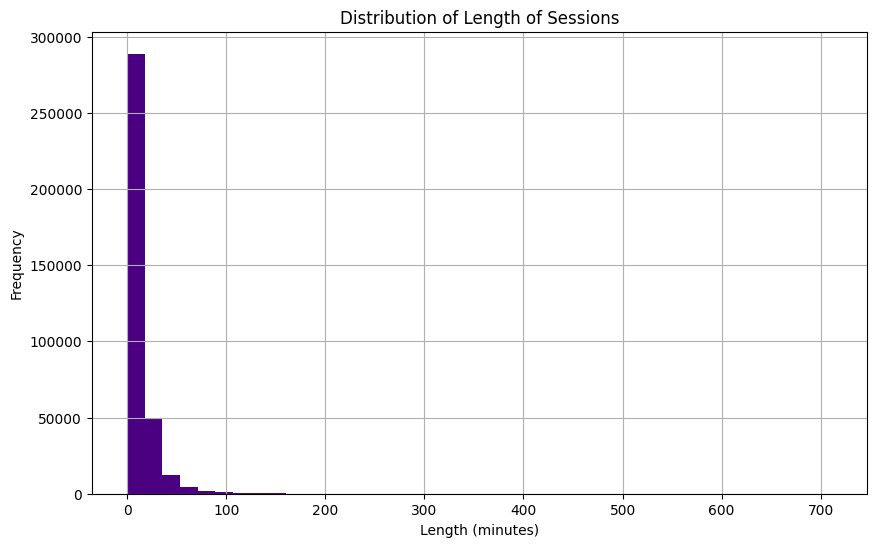

In [ ]:
sessions_len['duration_mins'].hist(bins=40, figsize=(10,6), color='indigo')

plt.title('Distribution of Length of Sessions')

plt.xlabel('Length (minutes)')
plt.ylabel('Frequency')

plt.show()

In [ ]:
sessions_len[sessions_len['duration_mins'] > 200]

,uid,start_ts,end_ts,duration_mins
760,4011112376118593718,2017-11-24 12:30:00,2017-11-24 16:34:00,244
1197,2909927403543287328,2017-07-21 11:04:00,2017-07-21 20:06:00,542
2775,11171561711096037819,2018-02-23 10:30:00,2018-02-23 14:23:00,233
7788,10403169074343195591,2018-05-18 20:47:00,2018-05-19 01:36:00,289
13224,530124657265254968,2017-09-25 08:58:00,2017-09-25 13:17:00,259
...,...,...,...,...
348039,15733864008959933881,2018-01-29 14:33:00,2018-01-29 19:16:00,283
348723,12780042542370479493,2018-02-15 10:12:00,2018-02-15 14:08:00,236
352395,11680900754697023979,2017-10-25 10:00:00,2017-10-25 13:28:00,208
355243,15087669361906245158,2017-12-05 12:17:00,2017-12-05 15:55:00,218


Распределение ненормальное, давайте поищем моду - самую частотную длину сессии

In [ ]:
session_mode = sessions_len['duration_mins'].mode().values[0]
print(f'Мода - {session_mode} минут.')

Мода - 1 минут.


Посчитаем ASL на пользователя

In [ ]:
len_per_user = sessions_len.groupby('uid').agg(total_duration = ('duration_mins', 'sum'), n_sessions = ('uid', 'count')).reset_index()
len_per_user['avg_duration'] = (len_per_user['total_duration'] / len_per_user['n_sessions']).astype('int')
len_per_user.sort_values(by='avg_duration', ascending=False)
len_per_user.head(10)

,uid,total_duration,n_sessions,avg_duration
0,11863502262781,6,1,6
1,49537067089222,2,1,2
2,297729379853735,1,1,1
3,313578113262317,33,3,11
4,325320750514679,10,2,5
5,397399764396656,1,1,1
6,407573351275847,5,1,5
7,498809019029702,2,1,2
8,526778907996220,83,4,20
9,577434573913691,18,2,9


In [ ]:
len_per_user.sort_values(by='avg_duration', ascending=False)

,uid,total_duration,n_sessions,avg_duration
177608,14362236456824330637,349,1,349
192590,15566184277200431914,745,3,248
49610,4011112376118593718,244,1,244
160256,12948011982480240230,218,1,218
127632,10308646180383620697,191,1,191
...,...,...,...,...
5735,470263698441502348,0,1,0
77592,6253668693240154354,0,1,0
20509,1666293510889515958,0,1,0
195616,15808460145067270774,0,1,0


In [ ]:
# session length per user
fig = px.histogram(len_per_user, x='avg_duration', nbins=40, color_discrete_sequence=['indigo'])

fig.update_layout(title='Distribution of Average Session Length',
                 xaxis_title='Average Session Duration (minutes)',
                 yaxis_title='Frequency')

fig.show()

session_user_mode = len_per_user['avg_duration'].mode().values[0]
print(f'Мода - {session_user_mode} минут.')

Мода - 1 минут.


У большинства пользователей сеансы длятся менее 10 минут, 1 минута - самое частотное. Гипотеза - большинство юзеров заходят на сайт "случайно" или уходят, не находя интересного им контента на первом экране

 [⬆ Back to Contents](#back)

#### Retention Rate <a id='retention_rate'></a>

Коэффициент удержания - еще один важный показатель, который может помочь нам проанализировать эффективность наших маркетинговых кампаний. Чтобы рассчитать его, мы начнем с разделения пользователей на ежемесячные группы.

In [ ]:
# Первая дата активности на каждого юзера
first_activity = visits.groupby('uid').agg({'session_date': 'min'}).reset_index()
first_activity.columns = ['uid', 'first_activity_date']
first_activity['first_activity_month'] = first_activity['first_activity_date'].dt.to_period('M').dt.to_timestamp()

# добавляем в таблицу
cohorts_month = visits[['uid', 'session_date']]
cohorts_month = cohorts_month.merge(first_activity, on='uid')

In [ ]:
first_activity.head()

,uid,first_activity_date,first_activity_month
0,11863502262781,2018-03-01,2018-03-01
1,49537067089222,2018-02-06,2018-02-01
2,297729379853735,2017-06-07,2017-06-01
3,313578113262317,2017-09-18,2017-09-01
4,325320750514679,2017-09-30,2017-09-01


In [ ]:
cohorts_month.head()

,uid,session_date,first_activity_date,first_activity_month
0,16879256277535980062,2017-12-20,2017-12-20,2017-12-01
1,104060357244891740,2018-02-19,2018-02-19,2018-02-01
2,7459035603376831527,2017-07-01,2017-07-01,2017-07-01
3,16174680259334210214,2018-05-20,2018-03-09,2018-03-01
4,9969694820036681168,2017-12-27,2017-12-27,2017-12-01


In [ ]:
# определяем когорту
cohorts_month['session_month'] = cohorts_month['session_date'].dt.to_period('M').dt.to_timestamp()
cohorts_month['cohort'] = cohorts_month['first_activity_date'].dt.to_period('M').dt.to_timestamp()

# считаем лайфтайм на юзера
cohorts_month['cohort_lifetime'] = (cohorts_month['session_month'] - cohorts_month['cohort']) / np.timedelta64(1, 'D')/30
cohorts_month['cohort_lifetime'] = cohorts_month['cohort_lifetime'].round().astype('int')

cohorts_month.sample(5)

,uid,session_date,first_activity_date,first_activity_month,session_month,cohort,cohort_lifetime
9747,3332376950344691601,2017-08-23,2017-08-23,2017-08-01,2017-08-01,2017-08-01,0
214711,10216751834229871222,2018-05-30,2018-05-30,2018-05-01,2018-05-01,2018-05-01,0
176711,5139615590553126732,2018-02-20,2017-06-14,2017-06-01,2018-02-01,2017-06-01,8
39469,13490631002723935148,2017-10-25,2017-10-25,2017-10-01,2017-10-01,2017-10-01,0
209557,497093626739020509,2017-09-05,2017-09-05,2017-09-01,2017-09-01,2017-09-01,0


In [ ]:
# Получаем кол-во юзеров в когортах по сроку жизни
cohorts = cohorts_month.groupby(['cohort', 'cohort_lifetime']).agg({'uid': 'nunique'}).reset_index()
cohorts = cohorts.rename(columns={'uid': 'uid_cnt'})
cohorts.head()

,cohort,cohort_lifetime,uid_cnt
0,2017-06-01,0,13259
1,2017-06-01,1,1043
2,2017-06-01,2,713
3,2017-06-01,3,814
4,2017-06-01,4,909


In [ ]:
users_by_cohort = cohorts.pivot_table(
    index='cohort',
    columns='cohort_lifetime',
    values='uid_cnt'
)
users_by_cohort.fillna('')

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
cohort,,,,,,,,,,,,
2017-06-01,13259.0,1043.0,713.0,814.0,909.0,947.0,809.0,766.0,694.0,674.0,539.0,596.0
2017-07-01,13140.0,737.0,674.0,738.0,765.0,633.0,596.0,601.0,510.0,376.0,361.0,
2017-08-01,10181.0,783.0,640.0,639.0,510.0,448.0,370.0,402.0,284.0,265.0,,
2017-09-01,16704.0,1428.0,1156.0,847.0,658.0,632.0,599.0,404.0,381.0,,,
2017-10-01,25977.0,2042.0,1357.0,1012.0,890.0,837.0,555.0,529.0,,,,
2017-11-01,27248.0,2133.0,1202.0,1054.0,919.0,638.0,594.0,,,,,
2017-12-01,25268.0,1410.0,960.0,786.0,512.0,481.0,,,,,,
2018-01-01,22624.0,1351.0,890.0,565.0,458.0,,,,,,,
2018-02-01,22197.0,1267.0,565.0,446.0,,,,,,,,


Чтобы рассчитать коэффициент удержания, нам сначала нужно получить начальное число пользователей в каждой когорте и разделить его на количество пользователей за каждый последующий месяц.

In [ ]:
# Размер когорт
initial_user_count = cohorts[cohorts['cohort_lifetime'] == 0][['cohort', 'uid_cnt']]
initial_user_count.columns = ['cohort', 'initial_user_cnt']

initial_user_count

,cohort,initial_user_cnt
0,2017-06-01,13259
12,2017-07-01,13140
23,2017-08-01,10181
33,2017-09-01,16704
42,2017-10-01,25977
50,2017-11-01,27248
57,2017-12-01,25268
63,2018-01-01,22624
68,2018-02-01,22197
72,2018-03-01,20589


In [ ]:
cohorts = cohorts.merge(initial_user_count, on='cohort')

In [ ]:
# Ретеншн
cohorts['retention'] = (cohorts['uid_cnt'] / cohorts['initial_user_cnt']).round(3)

In [ ]:
cohorts.head()

,cohort,cohort_lifetime,uid_cnt,initial_user_cnt,retention
0,2017-06-01,0,13259,13259,1.000
1,2017-06-01,1,1043,13259,0.079
2,2017-06-01,2,713,13259,0.054
3,2017-06-01,3,814,13259,0.061
4,2017-06-01,4,909,13259,0.069


In [ ]:
retention_pivot = cohorts.pivot_table(
                index='cohort',
                columns='cohort_lifetime',
                values='retention'
)


In [ ]:
retention_pivot

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
cohort,,,,,,,,,,,,
2017-06-01,1.0,0.079,0.054,0.061,0.069,0.071,0.061,0.058,0.052,0.051,0.041,0.045
2017-07-01,1.0,0.056,0.051,0.056,0.058,0.048,0.045,0.046,0.039,0.029,0.027,NaN
2017-08-01,1.0,0.077,0.063,0.063,0.050,0.044,0.036,0.039,0.028,0.026,NaN,NaN
2017-09-01,1.0,0.085,0.069,0.051,0.039,0.038,0.036,0.024,0.023,NaN,NaN,NaN
2017-10-01,1.0,0.079,0.052,0.039,0.034,0.032,0.021,0.020,NaN,NaN,NaN,NaN
2017-11-01,1.0,0.078,0.044,0.039,0.034,0.023,0.022,NaN,NaN,NaN,NaN,NaN
2017-12-01,1.0,0.056,0.038,0.031,0.020,0.019,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,1.0,0.060,0.039,0.025,0.020,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,1.0,0.057,0.025,0.020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


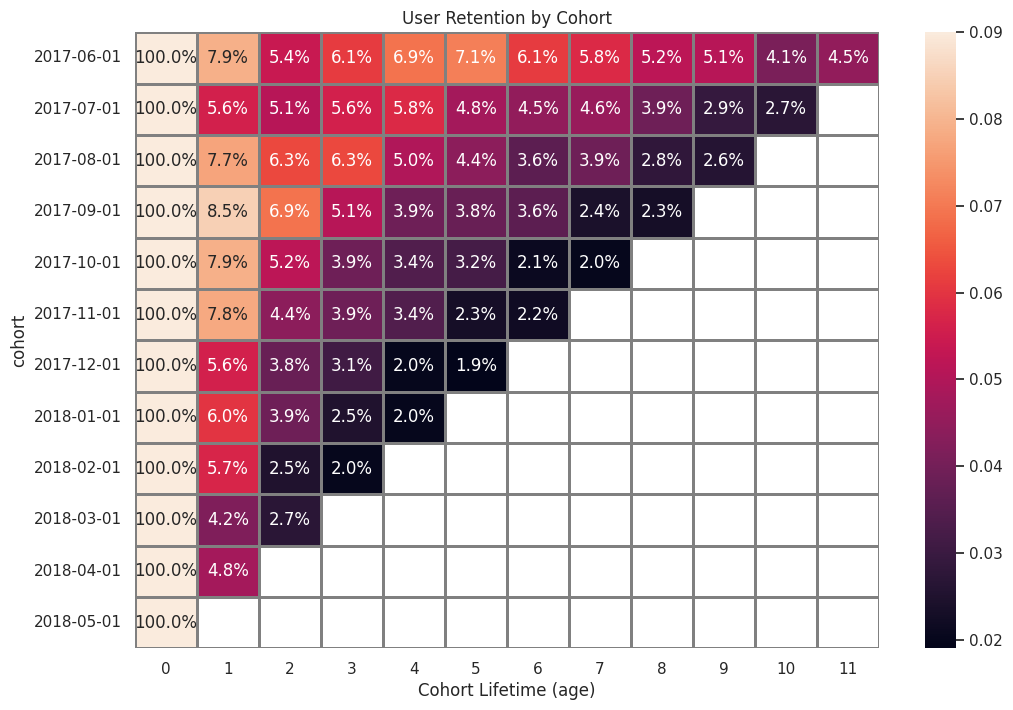

In [ ]:
sns.set(style='white')

retention_pivot.index=retention_pivot.index.astype(str)

plt.figure(figsize=(12, 8))
plt.title('User Retention by Cohort')

heatmap = sns.heatmap(
    retention_pivot, annot=True, fmt='.1%', vmax=0.09, linewidths=1, linecolor='gray'
)
heatmap.set_xlabel('Cohort Lifetime (age)')

plt.show()

Достаточно ожидаемо с учетом кол-ва сессий и стики-фактором, показатель удержания резко снижается по истечении одного месяца для каждой группы, особенно для групп после декабря 2017 года. В период с июня по ноябрь 2017 года уровень удержания в течение первого месяца был самым высоким (за исключением июля). В целом, уровень удержания продолжает снижаться с каждым месяцем, за некоторыми незначительными исключениями. Кажется, что показатели удержания снижаются быстрее в каждой последующей группе, в большинстве случаев на 2-3% быстрее, чем в предыдущей.

 [⬆ Back to Contents](#back)

### Продажи (Гроус-метрики) <a id='metrics_sales'></a>

Процесс продаж является важнейшим аспектом взаимодействия с клиентами, и связанные с ним показатели также помогут нам определить ценности, которые мы получаем от каждого клиента. Мы проанализируем время до конверсии, количество заказов, сделанных за определенный период времени, сумму, потраченную каждой группой за каждый период, и средний доход, полученный от каждой группы.

#### Time to Conversion <a id='conversion'><a/>

Сначала мы рассчитаем время, прошедшее между регистрацией и первой покупкой. Это поможет нам понять конверсии и определить оптимальные времена конверсии. Давайте начнем с получения даты первой покупки для каждого пользователя, чтобы позже сравнить ее с датой первой активности на сайте.

In [ ]:
orders.head()

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [ ]:
# Какой логикой будем руководствоваться?
purchases = orders.groupby('uid').agg(first_purchase =('buy_ts','min')).reset_index()
purchases['first_purchase'] = purchases['first_purchase'].dt.floor('D')

In [ ]:
purchases.head()

,uid,first_purchase
0,313578113262317,2018-01-03
1,1575281904278712,2017-06-03
2,2429014661409475,2017-10-11
3,2464366381792757,2018-01-28
4,2551852515556206,2017-11-24


In [ ]:
first_activity.head()

,uid,first_activity_date,first_activity_month
0,11863502262781,2018-03-01,2018-03-01
1,49537067089222,2018-02-06,2018-02-01
2,297729379853735,2017-06-07,2017-06-01
3,313578113262317,2017-09-18,2017-09-01
4,325320750514679,2017-09-30,2017-09-01


In [ ]:

first_buy = first_activity.merge(purchases, how='inner')
first_buy['conversion_days'] = (first_buy['first_purchase'] - first_buy['first_activity_date'])/np.timedelta64(1, 'D')
first_buy.head(10)

,uid,first_activity_date,first_activity_month,first_purchase,conversion_days
0,313578113262317,2017-09-18,2017-09-01,2018-01-03,107.0
1,1575281904278712,2017-06-03,2017-06-01,2017-06-03,0.0
2,2429014661409475,2017-10-11,2017-10-01,2017-10-11,0.0
3,2464366381792757,2018-01-27,2018-01-01,2018-01-28,1.0
4,2551852515556206,2017-11-24,2017-11-01,2017-11-24,0.0
5,3077748354309989,2018-03-03,2018-03-01,2018-03-03,0.0
6,3605148382144603,2017-08-15,2017-08-01,2017-09-21,37.0
7,3753586865891862,2018-03-03,2018-03-01,2018-03-03,0.0
8,4808417689019433,2018-01-09,2018-01-01,2018-01-09,0.0
9,4992223027560440,2018-04-04,2018-04-01,2018-04-04,0.0


In [ ]:
fig = px.histogram(first_buy, x='conversion_days', nbins=40, color_discrete_sequence=['indigo'])

fig.update_layout(title='Distribution of Time to Conversion',
                 xaxis_title='Days to Conversion',
                 yaxis_title='Frequency')

fig.update_xaxes(range=[0, 150])

fig.show()

Большинство конвертится до 9 дней

In [ ]:
first_buy['conversion_days'].value_counts(normalize=True).head()

,proportion
conversion_days,
0.0,0.685568
1.0,0.053829
2.0,0.018755
3.0,0.012376
4.0,0.010569


Почти 70% конвертятся в первый день. Может значить, что у нас хорошая таргетинговая реклама

In [ ]:
conversion = (orders['uid'].nunique() / visits['uid'].nunique())*100
print(f'The total conversion rate is {conversion:.2f}%.')

The total conversion rate is 16.01%.


Посмотрим есть ли разница в конверсии по когортам

In [ ]:
# Месяц первого заказа
first_purchase = orders.groupby('uid').agg({'buy_ts': 'min'}).reset_index()
first_purchase.columns = ['uid', 'first_purchase']

first_purchase['first_purchase'] = first_purchase['first_purchase'].dt.floor('D')
first_purchase['first_purchase_month'] = first_purchase['first_purchase'].dt.to_period('M').dt.to_timestamp()

first_purchase.head()

,uid,first_purchase,first_purchase_month
0,313578113262317,2018-01-03,2018-01-01
1,1575281904278712,2017-06-03,2017-06-01
2,2429014661409475,2017-10-11,2017-10-01
3,2464366381792757,2018-01-28,2018-01-01
4,2551852515556206,2017-11-24,2017-11-01


In [ ]:

cohort_conversion = first_activity.merge(first_purchase, on='uid', how='left')

cohort_conversion['age'] = (cohort_conversion['first_purchase_month'] - cohort_conversion['first_activity_month']) / np.timedelta64(1, 'D') / 30
cohort_conversion['age'] = round(cohort_conversion['age'], 0)

cohort_conversion.head()

,uid,first_activity_date,first_activity_month,first_purchase,first_purchase_month,age
0,11863502262781,2018-03-01,2018-03-01,NaT,NaT,NaN
1,49537067089222,2018-02-06,2018-02-01,NaT,NaT,NaN
2,297729379853735,2017-06-07,2017-06-01,NaT,NaT,NaN
3,313578113262317,2017-09-18,2017-09-01,2018-01-03,2018-01-01,4.0
4,325320750514679,2017-09-30,2017-09-01,NaT,NaT,NaN


In [ ]:
# месяц первой активности
first_activity['first_activity_month'] = first_activity['first_activity_date'].dt.to_period('M').dt.to_timestamp()

In [ ]:
conversion_pivot = cohort_conversion.pivot_table(
                    index='first_activity_month',
                    columns='age',
                    values='uid',
                    aggfunc='nunique')
#conversion_pivot.fillna('')

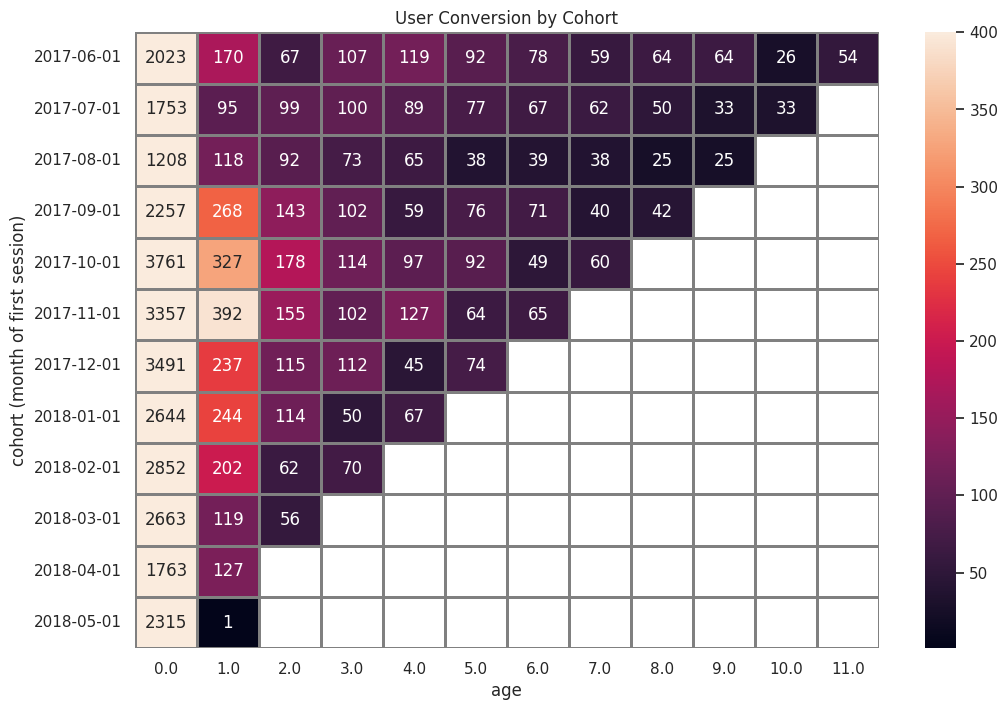

In [ ]:
conversion_pivot.index=conversion_pivot.index.astype(str)

plt.figure(figsize=(12, 8))
plt.title('User Conversion by Cohort')
heatmap = sns.heatmap(
    conversion_pivot, annot=True, fmt='.0f', vmax=400, linewidths=1, linecolor='gray'
)

heatmap.set_ylabel('cohort (month of first session)')
plt.show()

Для каждой группы основная активность по совершению покупок приходится на первый месяц регистрации. Из графика видно, что вероятность того, что пользователь станет нашим клиентом после первых месяцев, резко снижается и продолжает снижаться с каждым последующим месяцем.

 [⬆ Back to Contents](#back)

#### Кол-во ордеров <a id='num_orders'></a>

Чтобы подсчитать, сколько заказов клиенты сделали за определенный период времени, давайте рассчитаем новые когорты клиентов, основываясь на месяце их первого заказа.

In [ ]:
# Когорты по первому заказу
purchase_cohort = orders.merge(purchases, on='uid', how='left')

purchase_cohort['buy_ts'] = purchase_cohort['buy_ts'].dt.floor('D')
purchase_cohort['purchase_month'] = purchase_cohort['buy_ts'].dt.to_period('M').dt.to_timestamp()

purchase_cohort['cohort'] = purchase_cohort['first_purchase'].dt.to_period('M').dt.to_timestamp()
purchase_cohort['lifetime'] = (purchase_cohort['purchase_month'] - purchase_cohort['cohort']) / np.timedelta64(1, 'D') / 30
purchase_cohort['lifetime'] = purchase_cohort['lifetime'].round().astype('int')

purchase_cohort.sample(10)

,buy_ts,revenue,uid,first_purchase,purchase_month,cohort,lifetime
32495,2018-02-01,0.43,258691493090517643,2018-02-01,2018-02-01,2018-02-01,0
31975,2018-01-30,24.44,2882597878029206344,2018-01-25,2018-01-01,2018-01-01,0
16819,2017-11-09,9.17,7229652080328480513,2017-11-09,2017-11-01,2017-11-01,0
38383,2018-03-05,1.67,3510143828428808664,2018-03-05,2018-03-01,2018-03-01,0
36109,2018-02-21,3.67,2313152030128111040,2018-02-13,2018-02-01,2018-02-01,0
14048,2017-10-22,4.58,12836980319140710363,2017-09-24,2017-10-01,2017-09-01,1
1755,2017-06-21,2.02,6925353920158492020,2017-06-21,2017-06-01,2017-06-01,0
32290,2018-02-01,0.12,1836632942117142418,2018-02-01,2018-02-01,2018-02-01,0
20135,2017-11-25,0.18,8611936819511753864,2017-11-25,2017-11-01,2017-11-01,0
23053,2017-12-09,0.92,13226802140542956479,2017-12-09,2017-12-01,2017-12-01,0


In [ ]:
orders_pivot = purchase_cohort.pivot_table(
                index='cohort',
                columns='lifetime',
                values='uid',
                aggfunc='count'
)
orders_pivot.fillna('')

lifetime,0,1,2,3,4,5,6,7,8,9,10,11
cohort,,,,,,,,,,,,
2017-06-01,2354.0,177.0,174.0,226.0,292.0,218.0,276.0,174.0,212.0,153.0,96.0,86.0
2017-07-01,2186.0,100.0,120.0,104.0,72.0,82.0,61.0,50.0,58.0,24.0,53.0,
2017-08-01,1533.0,108.0,100.0,81.0,85.0,62.0,49.0,78.0,46.0,46.0,,
2017-09-01,2933.0,219.0,161.0,164.0,67.0,109.0,108.0,56.0,61.0,,,
2017-10-01,4964.0,314.0,162.0,122.0,129.0,103.0,86.0,125.0,,,,
2017-11-01,4813.0,397.0,182.0,211.0,136.0,59.0,102.0,,,,,
2017-12-01,5052.0,270.0,202.0,179.0,86.0,105.0,,,,,,
2018-01-01,3783.0,224.0,159.0,64.0,78.0,,,,,,,
2018-02-01,4095.0,222.0,83.0,70.0,,,,,,,,


Чтобы увидеть среднее количество заказов, которые клиенты делают за каждый месяц для каждой когорты, давайте разделим общее количество заказов за каждый период на размер когорты.

In [ ]:
# кол-во пользователей по когортам
cohort_size = purchase_cohort.groupby('cohort').agg({'uid': 'nunique'}).reset_index()
cohort_size.columns=['cohort', 'cohort_size']

In [ ]:
cohort_size.head()

,cohort,cohort_size
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340


In [ ]:
# кол-во заказов по пользователям в каждой когорте
orders_per_customer = purchase_cohort.groupby(['cohort', 'purchase_month', 'lifetime']).agg(orders_made=('uid', 'count')).reset_index()
orders_per_customer = orders_per_customer.merge(cohort_size, on='cohort', how='left')
orders_per_customer['orders_per_customer'] = round((orders_per_customer['orders_made'] / orders_per_customer['cohort_size']), 2)
orders_per_customer.head(10)

,cohort,purchase_month,lifetime,orders_made,cohort_size,orders_per_customer
0,2017-06-01,2017-06-01,0,2354,2023,1.16
1,2017-06-01,2017-07-01,1,177,2023,0.09
2,2017-06-01,2017-08-01,2,174,2023,0.09
3,2017-06-01,2017-09-01,3,226,2023,0.11
4,2017-06-01,2017-10-01,4,292,2023,0.14
5,2017-06-01,2017-11-01,5,218,2023,0.11
6,2017-06-01,2017-12-01,6,276,2023,0.14
7,2017-06-01,2018-01-01,7,174,2023,0.09
8,2017-06-01,2018-02-01,8,212,2023,0.10
9,2017-06-01,2018-03-01,9,153,2023,0.08


In [ ]:
orders_customers = orders_per_customer.pivot_table(
                                            index='cohort',
                                            columns='lifetime',
                                            values='orders_per_customer'
                                            )
#orders_customers.fillna('')

In [ ]:
orders_customers

lifetime,0,1,2,3,4,5,6,7,8,9,10,11
cohort,,,,,,,,,,,,
2017-06-01,1.16,0.09,0.09,0.11,0.14,0.11,0.14,0.09,0.10,0.08,0.05,0.04
2017-07-01,1.14,0.05,0.06,0.05,0.04,0.04,0.03,0.03,0.03,0.01,0.03,NaN
2017-08-01,1.12,0.08,0.07,0.06,0.06,0.05,0.04,0.06,0.03,0.03,NaN,NaN
2017-09-01,1.14,0.08,0.06,0.06,0.03,0.04,0.04,0.02,0.02,NaN,NaN,NaN
2017-10-01,1.14,0.07,0.04,0.03,0.03,0.02,0.02,0.03,NaN,NaN,NaN,NaN
2017-11-01,1.18,0.10,0.04,0.05,0.03,0.01,0.02,NaN,NaN,NaN,NaN,NaN
2017-12-01,1.15,0.06,0.05,0.04,0.02,0.02,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,1.12,0.07,0.05,0.02,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,1.12,0.06,0.02,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


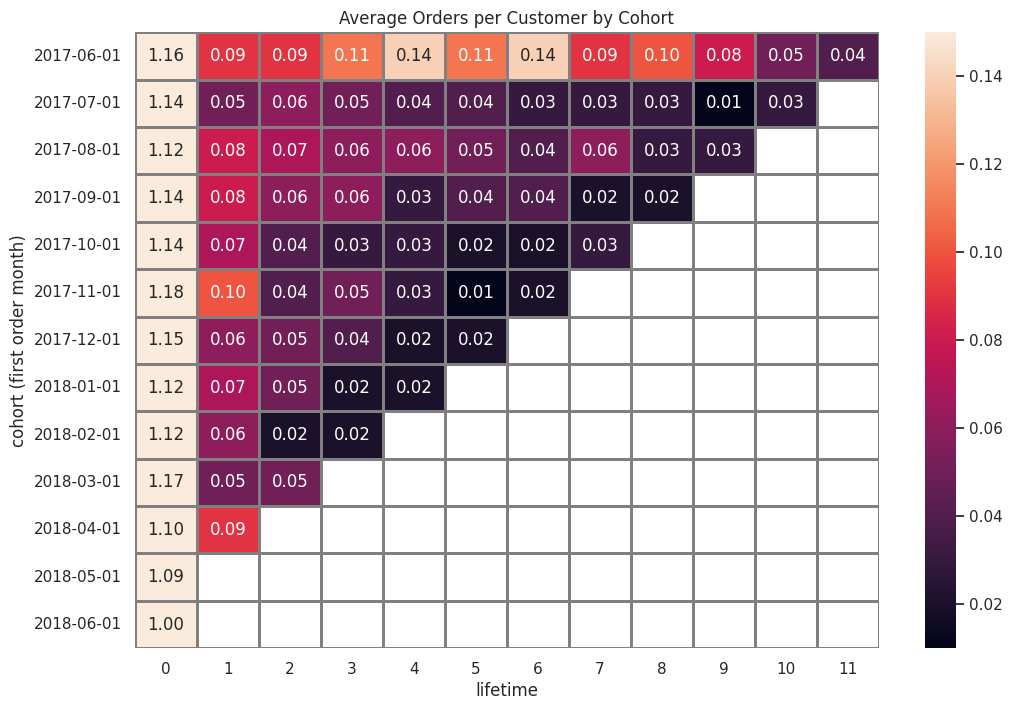

In [ ]:
orders_customers.index=orders_customers.index.astype(str)

plt.figure(figsize=(12, 8))
plt.title('Average Orders per Customer by Cohort')
heatmap = sns.heatmap(
    orders_customers, annot=True, fmt='.2f', vmax=0.15, linewidths=1, linecolor='gray'
)

heatmap.set_ylabel('cohort (first order month)')
plt.show()

Для каждой группы количество заказов на одного клиента за первый месяц в среднем превышает 1, что означает, что некоторые клиенты сделали более одного заказа. Начиная со второго месяца, это число снижается до 0,1 или менее для каждой группы, и в большинстве случаев оно продолжает снижаться в последующие месяцы. Это указывает на то, что очень немногие клиенты из каждой группы размещают заказы в последующие месяцы, у нас небольшой стики-фактор. Первая группа (июнь 2017 г.) - единственная, в которой количество заказов на одного клиента увеличилось, достигнув более 10% от общего числа клиентов, размещавших заказы в некоторые месяцы.

 [⬆ Back to Contents](#back)

#### Средний чек <a id='purchase_size'></a>

In [ ]:
cohort_size.head()

,cohort,cohort_size
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340


In [ ]:
purchase_cohort = purchase_cohort.merge(cohort_size, on='cohort', how='inner')

In [ ]:
spent_per_month = purchase_cohort.groupby(['cohort', 'purchase_month', 'lifetime']).agg(total_spent=('revenue', 'sum'), avg_spent=('revenue', 'mean')).reset_index()
spent_per_month = spent_per_month.merge(cohort_size, on='cohort', how='left')
spent_per_month['avg_spent_per_customer'] = round((spent_per_month['total_spent'] / spent_per_month['cohort_size']), 2)

spent_per_month.sample(10)

,cohort,purchase_month,lifetime,total_spent,avg_spent,cohort_size,avg_spent_per_customer
23,2017-08-01,2017-08-01,0,7228.83,4.715479,1370,5.28
58,2017-12-01,2018-01-01,1,1141.22,4.226741,4383,0.26
14,2017-07-01,2017-09-01,2,1199.05,9.992083,1923,0.62
71,2018-02-01,2018-05-01,3,270.70,3.867143,3651,0.07
37,2017-09-01,2018-01-01,4,1033.84,15.430448,2581,0.40
73,2018-03-01,2018-04-01,1,1063.05,5.972191,3533,0.30
6,2017-06-01,2017-12-01,6,1922.74,6.966449,2023,0.95
53,2017-11-01,2018-02-01,3,1326.13,6.284976,4081,0.32
0,2017-06-01,2017-06-01,0,9557.49,4.060106,2023,4.72
63,2018-01-01,2018-01-01,0,13949.50,3.687417,3373,4.14


In [ ]:
spent_pivot = spent_per_month.pivot_table(
                                         index='cohort',
                                          columns='lifetime',
                                          values='avg_spent'
                                         )
#spent_pivot.fillna('')

In [ ]:
purchase_cohort.head()

,buy_ts,revenue,uid,first_purchase,purchase_month,cohort,lifetime,cohort_size
0,2017-06-01,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01,0,2023
1,2017-06-01,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01,0,2023
2,2017-06-01,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01,0,2023
3,2017-06-01,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-06-01,0,2023
4,2017-06-01,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-06-01,0,2023


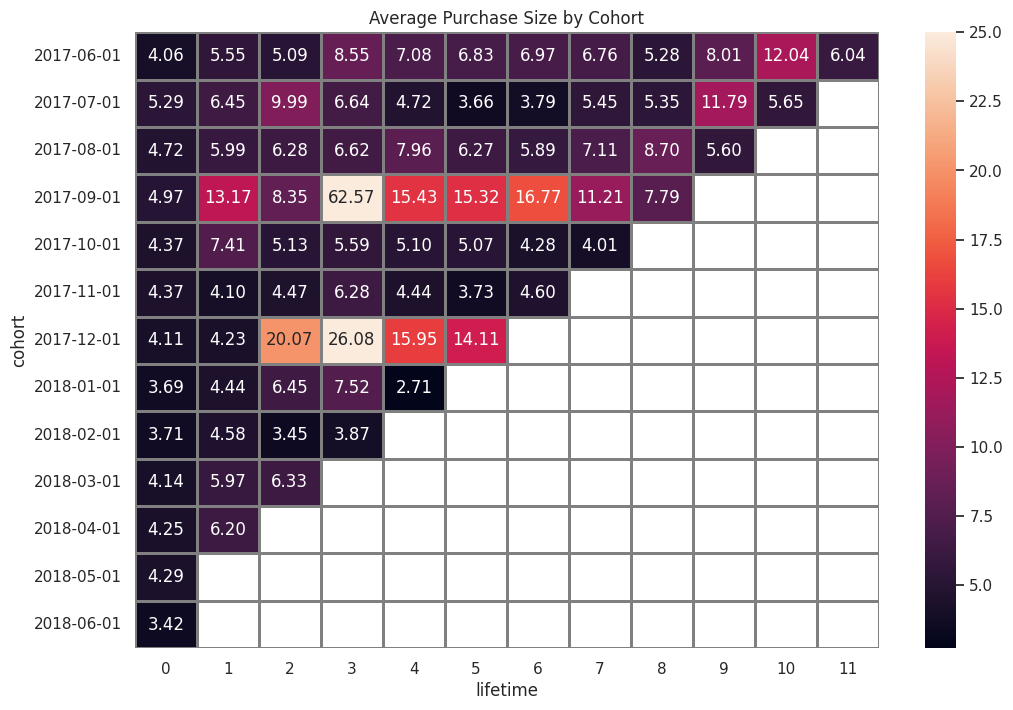

In [ ]:
spent_pivot.index=spent_pivot.index.astype(str)

plt.figure(figsize=(12, 8))
plt.title('Average Purchase Size by Cohort')
sns.heatmap(
    spent_pivot, annot=True, fmt='.2f', vmax=25, linewidths=1, linecolor='gray'
)

plt.show()

Средний чек покупки относительно постоянен для каждой группы, составляя в среднем от 4 до 7 долларов в течение большинства периодов, а в некоторых случаях достигает около 10 долларов. В сентябре и декабре 2017 года наблюдалась особая динамика, при которой средняя сумма потраченных средств в течение нескольких периодов превышала 15 долларов и даже доходила до 62 долларов. Это может быть связано с исключительно крупными покупками, совершенными несколькими клиентами.

In [ ]:
avg_purchase_size = orders['revenue'].sum() / orders['revenue'].count()

print(f'Overall, the average purchase size is ${avg_purchase_size:.2f}.')

Overall, the average purchase size is $5.00.


 [⬆ Back to Contents](#back)

#### Customer Lifetime Value (LTV) <a id='ltv'></a>

Мы перейдем к расчету предполагаемого среднего дохода, который клиент получает на протяжении всей своей жизни.

In [ ]:
spent_per_month.head()

,cohort,purchase_month,lifetime,total_spent,avg_spent,cohort_size,avg_spent_per_customer
0,2017-06-01,2017-06-01,0,9557.49,4.060106,2023,4.72
1,2017-06-01,2017-07-01,1,981.82,5.547006,2023,0.49
2,2017-06-01,2017-08-01,2,885.34,5.088161,2023,0.44
3,2017-06-01,2017-09-01,3,1931.30,8.545575,2023,0.95
4,2017-06-01,2017-10-01,4,2068.58,7.084178,2023,1.02


In [ ]:
ltv_pivot = spent_per_month.pivot_table(
                                         index='cohort',
                                          columns='lifetime',
                                          values='avg_spent_per_customer'                                         ).cumsum(axis=1)

#ltv_pivot.fillna('')

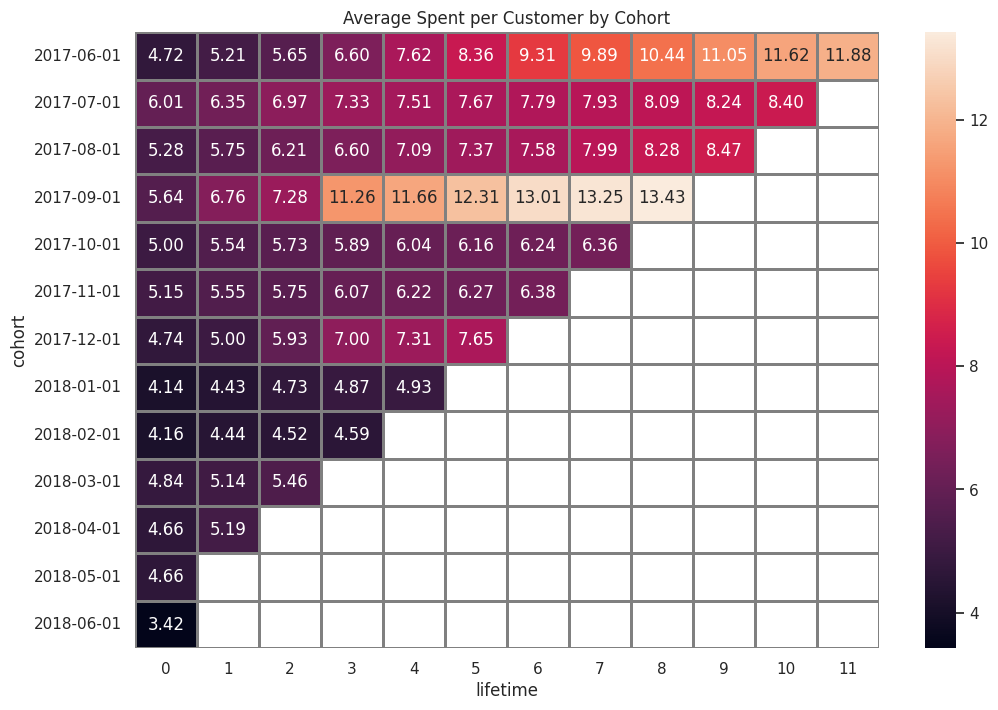

In [ ]:
ltv_pivot.index=ltv_pivot.index.astype(str)

plt.figure(figsize=(12, 8))
plt.title('Average Spent per Customer by Cohort')
sns.heatmap(
    ltv_pivot, annot=True, fmt='.2f', linewidths=1, linecolor='gray'
)

plt.show()

Средние расходы на одного клиента отличаются от среднего размера покупки. С каждым месяцем средние расходы увеличиваются. В сентябре клиенты тратят много в начале.

Между этими двумя показателями есть различия. Некоторые клиенты совершают крупные покупки и увеличивают средний показатель. Но большинство покупателей тратят одинаково.
В июне и сентябре покупки небольшие, но их много. Таким образом, средний показатель невелик, но средние расходы велики.

 [⬆ Back to Contents](#back)

### Маркетинг <a id='metrics_marketing'></a>

Эффективное распределение маркетинговых ресурсов требует понимания эффективности кампаний и таких показателей, как затраты на привлечение клиентов и окупаемость инвестиций. Мы проанализируем некоторые из этих показателей, чтобы оптимизировать наши маркетинговые расходы и добиться максимальной отдачи.

#### Общемаркетинговые затраты <a id='expenses'></a>

Сначала посмотрим распределение затрат по каналам

In [ ]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [ ]:
# Общие косты на маркетинг
costs['month'] = costs['dt'].dt.to_period('M').dt.to_timestamp()
costs_comp = costs.groupby(['month', 'source_id']).agg({'costs': 'sum'}).reset_index()

In [ ]:
costs_comp['month'] = costs_comp['month'].astype(str)

costs_pivot = costs_comp.pivot_table(
                               index='month',
                               columns='source_id',
                               values='costs',
                               aggfunc='sum',
                                margins=True,
                                margins_name='Total'
                                )
#costs_comp.head()

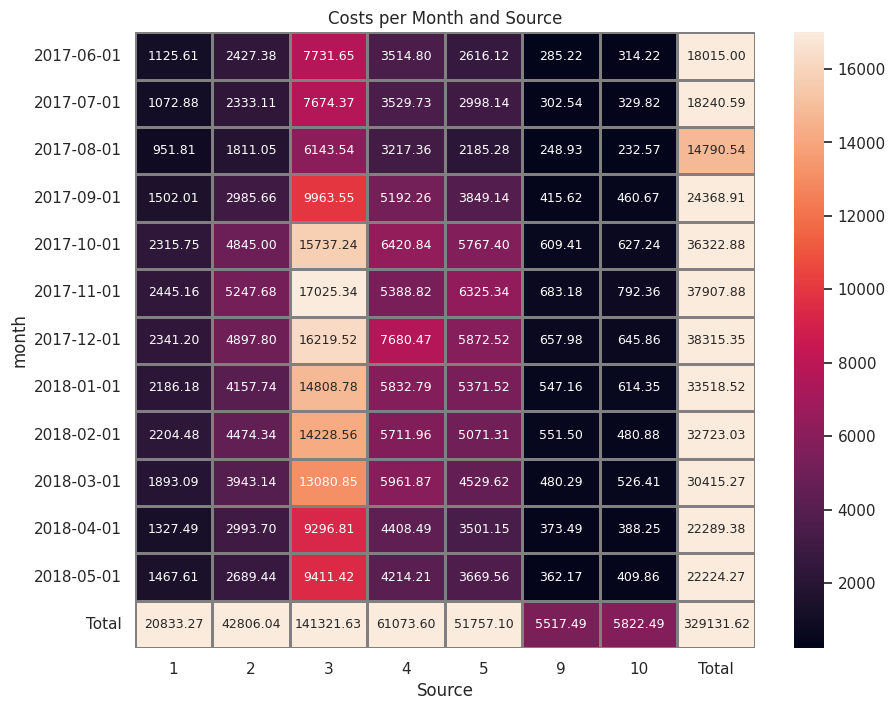

In [ ]:
plt.figure(figsize=(10, 8))
plt.title('Costs per Month and Source')
heatmap = sns.heatmap(
    costs_pivot, annot=True, fmt='.2f', vmax=17000, linewidths=1, linecolor='gray', annot_kws={"fontsize": 9}
)

heatmap.set_xlabel('Source')

plt.show()

In [ ]:
fig = px.area(costs_pivot,
              title='Costs per Month and Source',
              labels={'value': 'Costs'},
              color_discrete_sequence=px.colors.qualitative.Prism,
              )

fig.update_layout(legend_title='Source',
                  xaxis_title='Month',
                  yaxis_title='Costs'
                  )

fig.show()

Здесь мы можем увидеть общие затраты на маркетинг за каждый месяц для каждого источника и их соответствующие общие суммы. Общие затраты на маркетинг за весь период составили 329 131,52 долл. Мы можем наблюдать, что наибольшие расходы на маркетинг пришлись на ноябрь 2017 года для источника 3. Мы также можем видеть, что в целом источники 9 и 10 представляют собой более низкие затраты, а август 2017 года был месяцем с более низкими расходами.

In [ ]:
costs_per_month = costs.groupby('month').agg({'costs': 'sum'}).reset_index()

In [ ]:
costs_per_month.head()

,month,costs
0,2017-06-01,18015.00
1,2017-07-01,18240.59
2,2017-08-01,14790.54
3,2017-09-01,24368.91
4,2017-10-01,36322.88


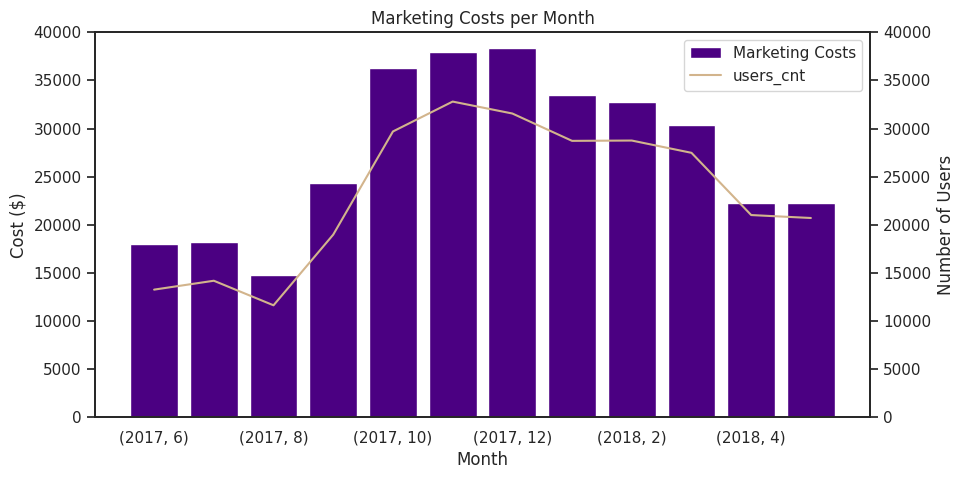

In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.bar(costs_per_month.index, costs_per_month['costs'], color='indigo', label='Marketing Costs')
ax1.set_title('Marketing Costs per Month')
ax1.set_xlabel('Month')
ax1.set_ylabel('Cost ($)')
ax1.set_ylim(0, 40000)

ax2 = ax1.twinx()
mau.plot(kind='line', ax=ax2, color='tan', rot=45, label='Number of Users', legend=False)
ax2.set_ylabel('Number of Users')
ax2.set_ylim(0, 40000)

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper right')

plt.show()

Здесь мы видим, что затраты на маркетинг, по-видимому, связаны с ежемесячным количеством активных пользователей. Чем выше затраты на маркетинг, тем больше число пользователей.

In [ ]:
total_cost = costs['costs'].sum()

print(f'The total costs on marketing for this period was ${total_cost:.2f}.')

The total costs on marketing for this period was $329131.62.


 [⬆ Back to Contents](#back)

#### Customer Acquisition Cost (CAC) <a id='cac'></a>

Сколько мы тратим на нового заказчика?

In [ ]:
cohort_size.head()

,cohort,cohort_size
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340


In [ ]:
costs_per_month.head()

,month,costs
0,2017-06-01,18015.00
1,2017-07-01,18240.59
2,2017-08-01,14790.54
3,2017-09-01,24368.91
4,2017-10-01,36322.88


In [ ]:
#задачка для хардкорных ребят
cac_per_month = costs_per_month.merge(cohort_size, how = 'inner', left_on = 'month', right_on = 'cohort')
cac_per_month['cac'] = cac_per_month['costs'] / cac_per_month['cohort_size']

In [ ]:
cac_per_month

,month,costs,cohort,cohort_size,cac
0,2017-06-01,18015.00,2017-06-01,2023,8.905091
1,2017-07-01,18240.59,2017-07-01,1923,9.485486
2,2017-08-01,14790.54,2017-08-01,1370,10.796015
3,2017-09-01,24368.91,2017-09-01,2581,9.441654
4,2017-10-01,36322.88,2017-10-01,4340,8.369327
5,2017-11-01,37907.88,2017-11-01,4081,9.288870
6,2017-12-01,38315.35,2017-12-01,4383,8.741809
7,2018-01-01,33518.52,2018-01-01,3373,9.937302
8,2018-02-01,32723.03,2018-02-01,3651,8.962758
9,2018-03-01,30415.27,2018-03-01,3533,8.608907


In [ ]:
cac_fig = px.line(cac_per_month, x='month', y='cac')

cac_fig.update_layout(title='Customer Acquisiton Cost per Month',
                  xaxis_title='Month',
                  yaxis_title='CAC'
                  )
cac_fig.show()

Давайте также рассчитаем CAC для каждого источника. Для этого нам сначала нужно найти исходный источник, который привел клиентов на платформу, и узнать количество клиентов, пришедших от каждого из них.

In [ ]:
# Получить данные по покупателям из визитов
customers = visits[visits['uid'].isin(orders['uid'])]
customers

,index,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date
3,3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20
5,5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017,9,35,2017-09-03
12,12,desktop,2018-02-06 15:50:00,4,2018-02-06 15:45:00,8056418121947262981,2018,2,6,2018-02-06
15,15,touch,2018-02-12 20:30:00,2,2018-02-12 19:24:00,18188358787673499603,2018,2,7,2018-02-12
25,25,desktop,2017-12-05 10:28:00,4,2017-12-05 10:21:00,2307401184189569202,2017,12,49,2017-12-05
...,...,...,...,...,...,...,...,...,...,...
359393,359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539,2017,7,30,2017-07-29
359394,359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,2018,1,4,2018-01-25
359395,359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294,2018,3,9,2018-03-03
359396,359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485,2017,11,44,2017-11-02


In [ ]:
# Достать первую сессию у каждого пользователя
first_visit_customer = customers.groupby('uid').agg({'start_ts': 'min'}).reset_index()
first_visit_customer['first_date'] = first_visit_customer['start_ts']
first_visit_customer = first_visit_customer.drop(['start_ts'], axis = 1)
first_visit_customer

,uid,first_date
0,313578113262317,2017-09-18 22:49:00
1,1575281904278712,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 17:14:00
3,2464366381792757,2018-01-27 20:10:00
4,2551852515556206,2017-11-24 10:14:00
...,...,...
36518,18445147675727495770,2017-08-20 13:30:00
36519,18445407535914413204,2017-09-22 23:48:00
36520,18445601152732270159,2017-08-07 11:51:00
36521,18446156210226471712,2017-11-07 10:01:00


In [ ]:
customers.head()

,index,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date
3,3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20
5,5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017,9,35,2017-09-03
12,12,desktop,2018-02-06 15:50:00,4,2018-02-06 15:45:00,8056418121947262981,2018,2,6,2018-02-06
15,15,touch,2018-02-12 20:30:00,2,2018-02-12 19:24:00,18188358787673499603,2018,2,7,2018-02-12
25,25,desktop,2017-12-05 10:28:00,4,2017-12-05 10:21:00,2307401184189569202,2017,12,49,2017-12-05


In [ ]:
first_visit_customer = first_visit_customer.merge(customers, how = 'inner', left_on=['uid', 'first_date'], right_on=['uid', 'start_ts'])
first_visit_customer['first_session_month'] = first_visit_customer['first_date'].dt.to_period('M').dt.to_timestamp()

first_visit_customer


,uid,first_date,index,device,end_ts,source_id,start_ts,session_year,session_month,session_week,session_date,first_session_month
0,313578113262317,2017-09-18 22:49:00,173142,desktop,2017-09-18 23:07:00,2,2017-09-18 22:49:00,2017,9,38,2017-09-18,2017-09-01
1,1575281904278712,2017-06-03 10:13:00,357823,touch,2017-06-03 10:17:00,10,2017-06-03 10:13:00,2017,6,22,2017-06-03,2017-06-01
2,2429014661409475,2017-10-11 17:14:00,344066,desktop,2017-10-11 17:27:00,3,2017-10-11 17:14:00,2017,10,41,2017-10-11,2017-10-01
3,2464366381792757,2018-01-27 20:10:00,38619,desktop,2018-01-27 20:13:00,5,2018-01-27 20:10:00,2018,1,4,2018-01-27,2018-01-01
4,2551852515556206,2017-11-24 10:14:00,358532,desktop,2017-11-24 10:14:19,5,2017-11-24 10:14:00,2017,11,47,2017-11-24,2017-11-01
...,...,...,...,...,...,...,...,...,...,...,...,...
36518,18445147675727495770,2017-08-20 13:30:00,309781,touch,2017-08-20 13:30:00,5,2017-08-20 13:30:00,2017,8,33,2017-08-20,2017-08-01
36519,18445407535914413204,2017-09-22 23:48:00,56314,desktop,2017-09-22 23:55:00,3,2017-09-22 23:48:00,2017,9,38,2017-09-22,2017-09-01
36520,18445601152732270159,2017-08-07 11:51:00,180045,desktop,2017-08-07 11:52:00,2,2017-08-07 11:51:00,2017,8,32,2017-08-07,2017-08-01
36521,18446156210226471712,2017-11-07 10:01:00,6242,desktop,2017-11-07 10:04:00,3,2017-11-07 10:01:00,2017,11,45,2017-11-07,2017-11-01


In [ ]:
customers_cnt = first_visit_customer.groupby(['first_session_month', 'source_id']).agg({'uid': 'count'}).reset_index()
customers_cnt

,first_session_month,source_id,uid
0,2017-06-01,1,240
1,2017-06-01,2,374
2,2017-06-01,3,886
3,2017-06-01,4,647
4,2017-06-01,5,509
...,...,...,...
80,2018-05-01,3,624
81,2018-05-01,4,611
82,2018-05-01,5,406
83,2018-05-01,9,30


In [ ]:
customers_cnt.head()

,first_session_month,source_id,uid
0,2017-06-01,1,240
1,2017-06-01,2,374
2,2017-06-01,3,886
3,2017-06-01,4,647
4,2017-06-01,5,509


In [ ]:
costs_comp.head()

,month,source_id,costs
0,2017-06-01,1,1125.61
1,2017-06-01,2,2427.38
2,2017-06-01,3,7731.65
3,2017-06-01,4,3514.80
4,2017-06-01,5,2616.12


In [ ]:
costs_comp['month'] = pd.to_datetime(costs_comp['month'])

cac_per_month_source = costs_comp.merge(customers_cnt, left_on=['month', 'source_id'], right_on=['first_session_month', 'source_id'])

cac_per_month_source.drop(columns=['first_session_month'], inplace=True)
cac_per_month_source = cac_per_month_source.rename(columns={'uid': 'user_cnt'})

#CAC
cac_per_month_source['cac'] = cac_per_month_source['costs'] / cac_per_month_source['user_cnt']

cac_per_month_source.head()

,month,source_id,costs,user_cnt,cac
0,2017-06-01,1,1125.61,240,4.690042
1,2017-06-01,2,2427.38,374,6.490321
2,2017-06-01,3,7731.65,886,8.726467
3,2017-06-01,4,3514.80,647,5.432457
4,2017-06-01,5,2616.12,509,5.139725


In [ ]:
# cac по источнику
fig = px.line(cac_per_month_source, x="month", y="cac", color='source_id')

fig.update_layout(title='Customer Acquisiton Cost CAC per Month per Source',
                  xaxis_title='Month',
                  yaxis_title='CAC')

fig.show()

Большинство источников имеют незначительную положительную динамику, что означает, что стоимость привлечения клиентов увеличилась для каждого источника за этот период времени. В апреле произошло внезапное увеличение для 9 источников. Это могло быть вызвано несколькими причинами, такими как разовое мероприятие (специальная кампания). Без дополнительных данных трудно определить точную причину такого увеличения.

Источник 10, по-видимому, является наиболее рентабельным, поскольку значения CAC для этого источника неизменно ниже, чем для большинства других источников.

In [ ]:
cac = cac_per_month_source['costs'].sum() / cac_per_month_source['user_cnt'].sum()

print(f'The overall Average Customer Acquisition Costs is ${cac:.2f}.')

The overall Average Customer Acquisition Costs is $9.01.


 [⬆ Back to Contents](#back)

#### Return on Investment (ROI) <a id='roi'></a>

Зная сколько нам стоит покупатель с каждого канала, мы можем оценить их эффективность и ROI

In [ ]:
#ROI = LTV / CAC

In [ ]:
spent_per_month.head()

,cohort,purchase_month,lifetime,total_spent,avg_spent,cohort_size,avg_spent_per_customer
0,2017-06-01,2017-06-01,0,9557.49,4.060106,2023,4.72
1,2017-06-01,2017-07-01,1,981.82,5.547006,2023,0.49
2,2017-06-01,2017-08-01,2,885.34,5.088161,2023,0.44
3,2017-06-01,2017-09-01,3,1931.30,8.545575,2023,0.95
4,2017-06-01,2017-10-01,4,2068.58,7.084178,2023,1.02


In [ ]:
ltv = spent_per_month[['cohort','purchase_month','lifetime', 'avg_spent_per_customer']]
ltv = ltv.rename(columns ={'cohort':'month', 'avg_spent_per_customer':'ltv'})

In [ ]:
cac_per_month

,month,costs,cohort,cohort_size,cac
0,2017-06-01,18015.00,2017-06-01,2023,8.905091
1,2017-07-01,18240.59,2017-07-01,1923,9.485486
2,2017-08-01,14790.54,2017-08-01,1370,10.796015
3,2017-09-01,24368.91,2017-09-01,2581,9.441654
4,2017-10-01,36322.88,2017-10-01,4340,8.369327
5,2017-11-01,37907.88,2017-11-01,4081,9.288870
6,2017-12-01,38315.35,2017-12-01,4383,8.741809
7,2018-01-01,33518.52,2018-01-01,3373,9.937302
8,2018-02-01,32723.03,2018-02-01,3651,8.962758
9,2018-03-01,30415.27,2018-03-01,3533,8.608907


In [ ]:
ltv

,month,purchase_month,lifetime,ltv
0,2017-06-01,2017-06-01,0,4.72
1,2017-06-01,2017-07-01,1,0.49
2,2017-06-01,2017-08-01,2,0.44
3,2017-06-01,2017-09-01,3,0.95
4,2017-06-01,2017-10-01,4,1.02
...,...,...,...,...
74,2018-03-01,2018-05-01,2,0.32
75,2018-04-01,2018-04-01,0,4.66
76,2018-04-01,2018-05-01,1,0.53
77,2018-05-01,2018-05-01,0,4.66


In [ ]:
roi = ltv.merge(cac_per_month, on='month')
roi['roi'] = roi['ltv'] / roi['cac']

roi

,month,purchase_month,lifetime,ltv,costs,cohort,cohort_size,cac,roi
0,2017-06-01,2017-06-01,0,4.72,18015.00,2017-06-01,2023,8.905091,0.530034
1,2017-06-01,2017-07-01,1,0.49,18015.00,2017-06-01,2023,8.905091,0.055025
2,2017-06-01,2017-08-01,2,0.44,18015.00,2017-06-01,2023,8.905091,0.049410
3,2017-06-01,2017-09-01,3,0.95,18015.00,2017-06-01,2023,8.905091,0.106681
4,2017-06-01,2017-10-01,4,1.02,18015.00,2017-06-01,2023,8.905091,0.114541
...,...,...,...,...,...,...,...,...,...
73,2018-03-01,2018-04-01,1,0.30,30415.27,2018-03-01,3533,8.608907,0.034848
74,2018-03-01,2018-05-01,2,0.32,30415.27,2018-03-01,3533,8.608907,0.037171
75,2018-04-01,2018-04-01,0,4.66,22289.38,2018-04-01,2276,9.793225,0.475839
76,2018-04-01,2018-05-01,1,0.53,22289.38,2018-04-01,2276,9.793225,0.054119


In [ ]:
roi_pivot = roi.pivot_table(
                           index='month',
                           columns='lifetime',
                           values='roi',
                           aggfunc='mean'
                           ).cumsum(axis=1).round(2)
#roi_pivot.fillna('')

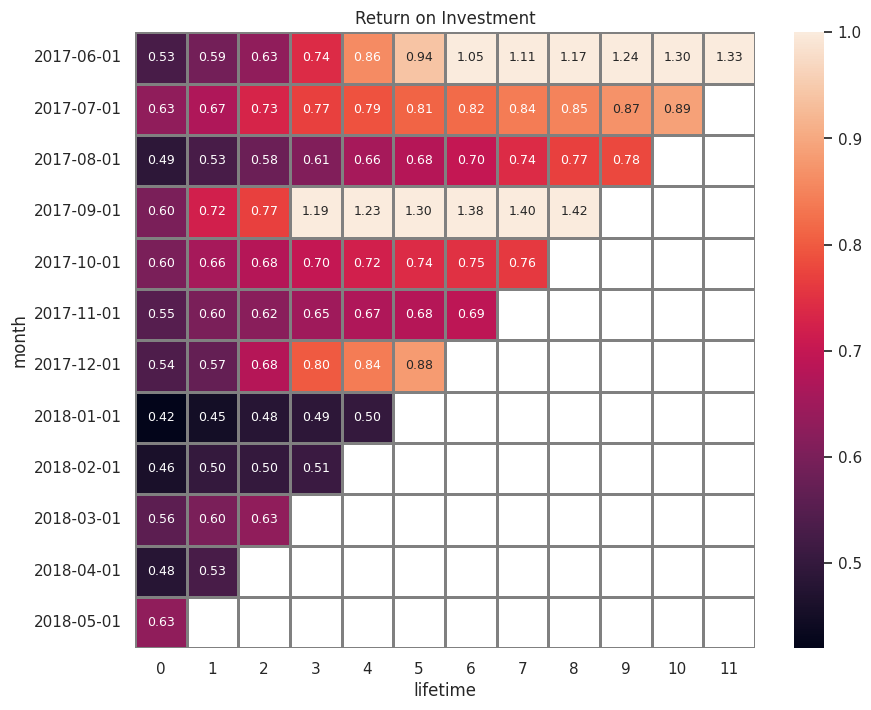

In [ ]:
roi_pivot.index=roi_pivot.index.astype(str)

plt.figure(figsize=(10, 8))
plt.title('Return on Investment')
sns.heatmap(
    roi_pivot, annot=True, fmt='.2f', vmax=1, linewidths=1, linecolor='gray', annot_kws={"fontsize": 9}
)

plt.show()

Мы не видим какой-либо конкретной закономерности, указывающей на то, в каком месяце эти группы начинают приносить прибыль. Единственные две группы, которые в настоящее время приносят больше дохода, чем первоначальные инвестиции, - это июньская и сентябрьская группы. Это те же группы, в которых средний показатель расходов на одного клиента был выше.

Наконец, давайте взглянем на рентабельность инвестиций для каждого источника. Давайте начнем этот расчет с получения общего дохода от клиентов, привлеченных из каждого источника, а затем разделим это значение на общую стоимость привлечения этих клиентов.

In [ ]:
# Выручка по каждому источнику
ltv_source = orders.merge(customers[['uid', 'source_id']], on='uid')

ltv_source = ltv_source.groupby('source_id').agg({'revenue': 'sum', 'uid': 'nunique'}).reset_index()
ltv_source = ltv_source.rename(columns={'uid': 'user_cnt'})
ltv_source['ltv'] =  ltv_source['revenue'] / ltv_source['user_cnt']

ltv_source

,source_id,revenue,user_cnt,ltv
0,1,2298200.17,7138,321.966961
1,2,2638189.21,7305,361.148420
2,3,296687.96,13846,21.427702
3,4,496690.17,14253,34.848114
4,5,1181477.14,10156,116.332920
5,7,1.22,1,1.220000
6,9,36342.25,2793,13.011905
7,10,14619.23,1773,8.245477


In [ ]:
costs.groupby('source_id').agg({'costs': 'sum'}).reset_index()

,source_id,costs
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10
5,9,5517.49
6,10,5822.49


In [ ]:
roi_source = costs.groupby('source_id').agg({'costs': 'sum'}).reset_index()
roi_source = roi_source.merge(ltv_source[['source_id', 'user_cnt', 'ltv']], on='source_id')
roi_source['cac'] = roi_source['costs'] / roi_source['user_cnt']
roi_source['romi'] = roi_source['ltv'] / roi_source['cac']
roi_source

,source_id,costs,user_cnt,ltv,cac,romi
0,1,20833.27,7138,321.966961,2.918642,110.313944
1,2,42806.04,7305,361.148420,5.859828,61.631237
2,3,141321.63,13846,21.427702,10.206676,2.099381
3,4,61073.60,14253,34.848114,4.284965,8.132649
4,5,51757.10,10156,116.332920,5.096209,22.827344
5,9,5517.49,2793,13.011905,1.975471,6.586736
6,10,5822.49,1773,8.245477,3.283976,2.510821


In [ ]:
fig = px.bar(roi_source, x='source_id', y='romi')
fig.update_xaxes(type='category')

fig.update_layout(title='Return on Marketing Investment',
                 xaxis_title='Source',
                 yaxis_title='ROMI')
fig.show()

Здесь мы видим, что источником с наибольшей отдачей от инвестиций на сегодняшний день является источник 1, за которым следует источник 2. Несмотря на то, что такие источники, как 10 и 4, кажутся более экономичными, поскольку у них более низкий CAC, клиенты, привлеченные из этих источников, могут быть не столь ценными с точки зрения их эффективности. покупательское поведение. Источник 1, по-видимому, является наиболее эффективным каналом с относительно низким CEC и самым высоким ROMI.

 [⬆ Back to Contents](#back)

# @grmmr